Вход: временные ряды (зависимости параметров системы от времени).

Выход: временные ряды, демонстрирующие выявленные аномалии в течение времени.

Цель: обнаружение аномальных режимов системы впрыска топлива с помощью методов машинного обучения.

# Сборка датасета


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
from tsaug.visualization import plot
from tsaug import TimeWarp, AddNoise, Dropout

## Визуализация периодов различных сценариев

### Нормальный сценарий

In [16]:
data_normal = pd.read_csv('sample_data/Scenario_Normal.csv')

In [24]:
NUMBER_POINTS = len(data_normal['FTL'])
LENGTH_PERIOD = NUMBER_POINTS / 10

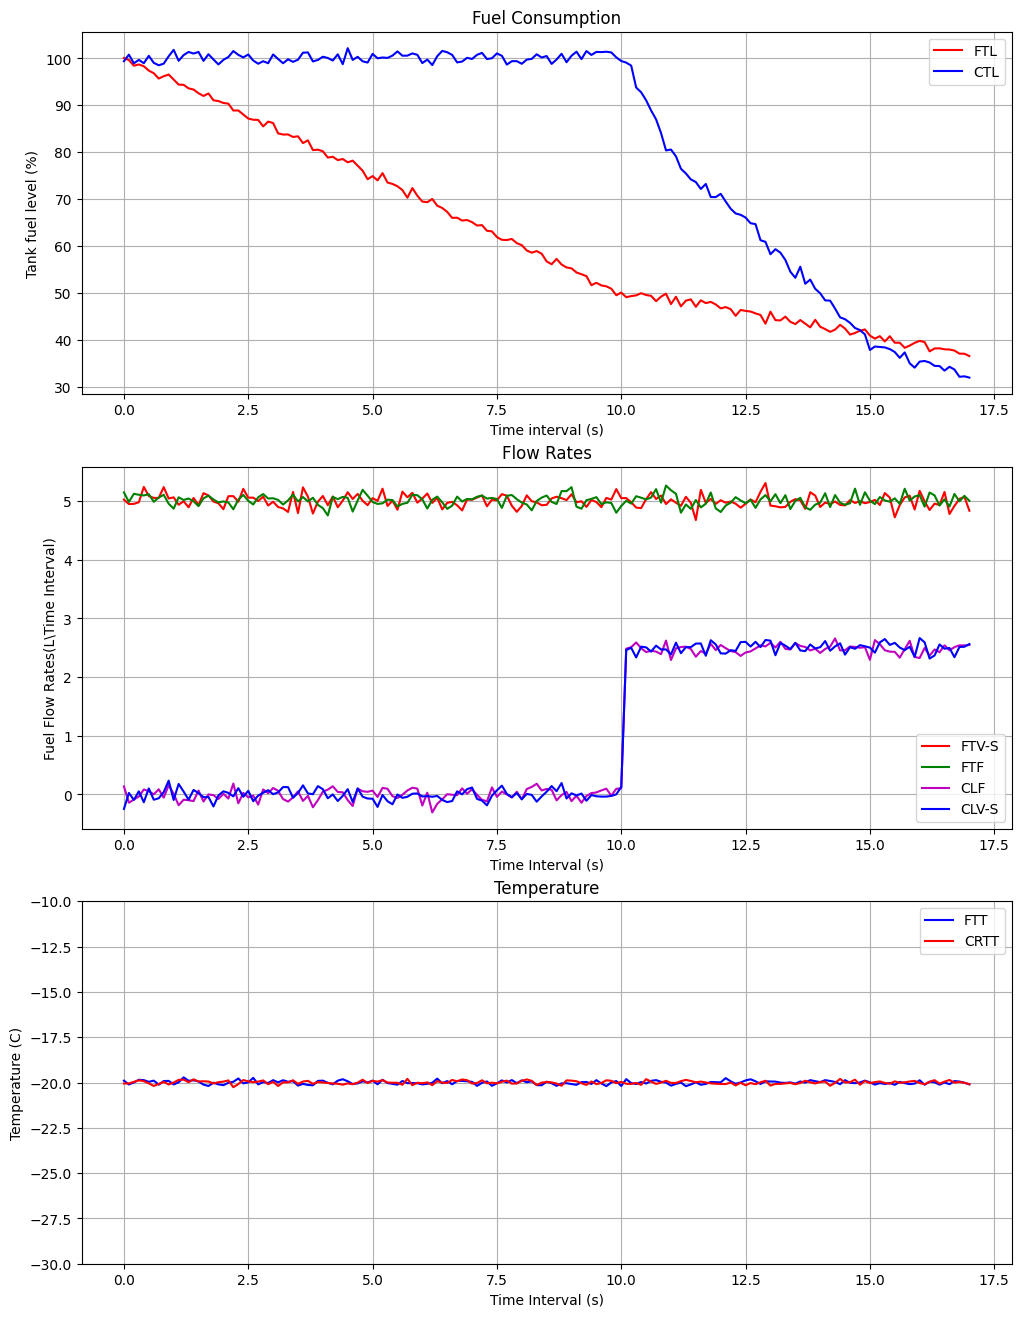

In [4]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_normal['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_normal['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_normal['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_normal['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_normal['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_normal['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_normal['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_normal['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set_ylim([-30, -10])
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 1

*Описание сценария*

In [17]:
data_1 = pd.read_csv('sample_data/Scenario_One.csv')

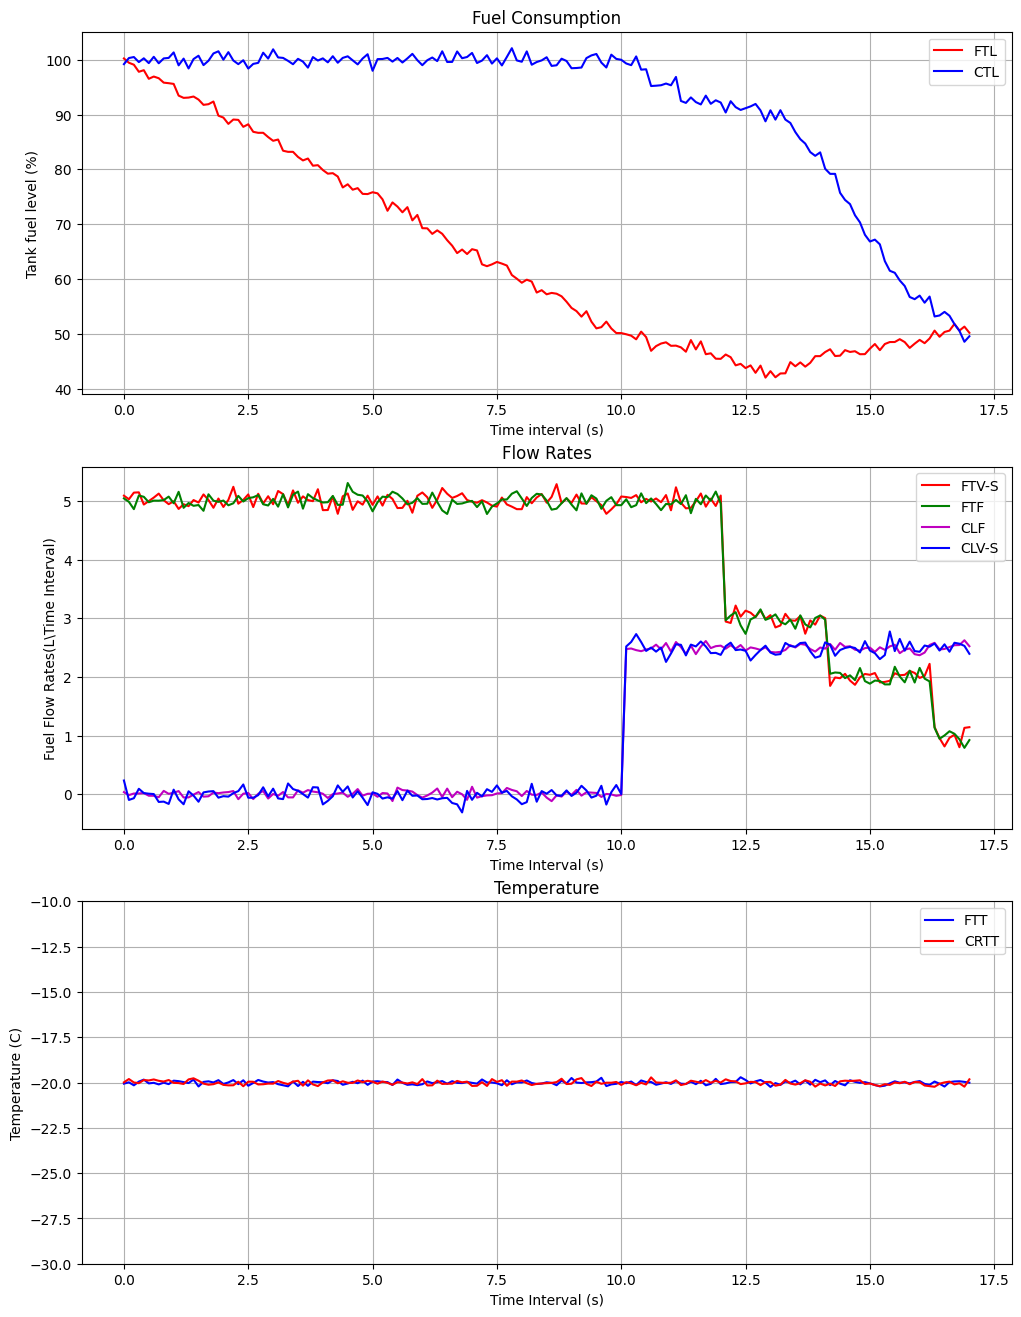

In [6]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_1['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_1['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_1['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_1['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_1['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_1['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_1['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_1['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].set_ylim([-30, -10])
axs[2].legend()
axs[2].grid()

### Сценарий 2

*Описание сценария*

In [18]:
data_2 = pd.read_csv('sample_data/Scenario_Two.csv')

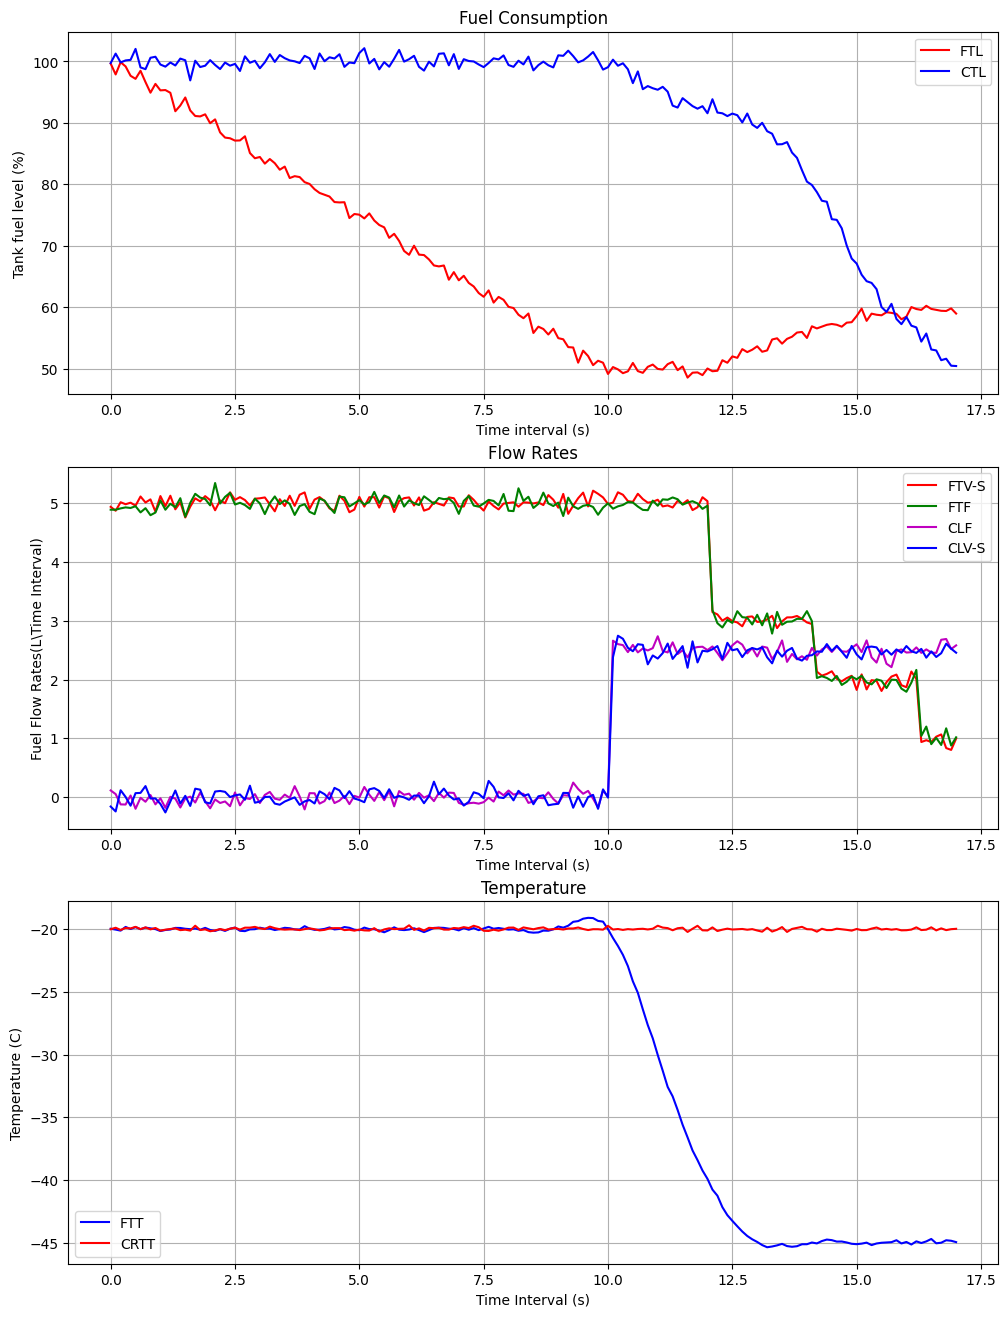

In [8]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_2['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_2['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_2['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_2['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_2['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_2['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_2['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_2['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 3

*Описание сценария*

In [19]:
data_3 = pd.read_csv('sample_data/Scenario_Three.csv')

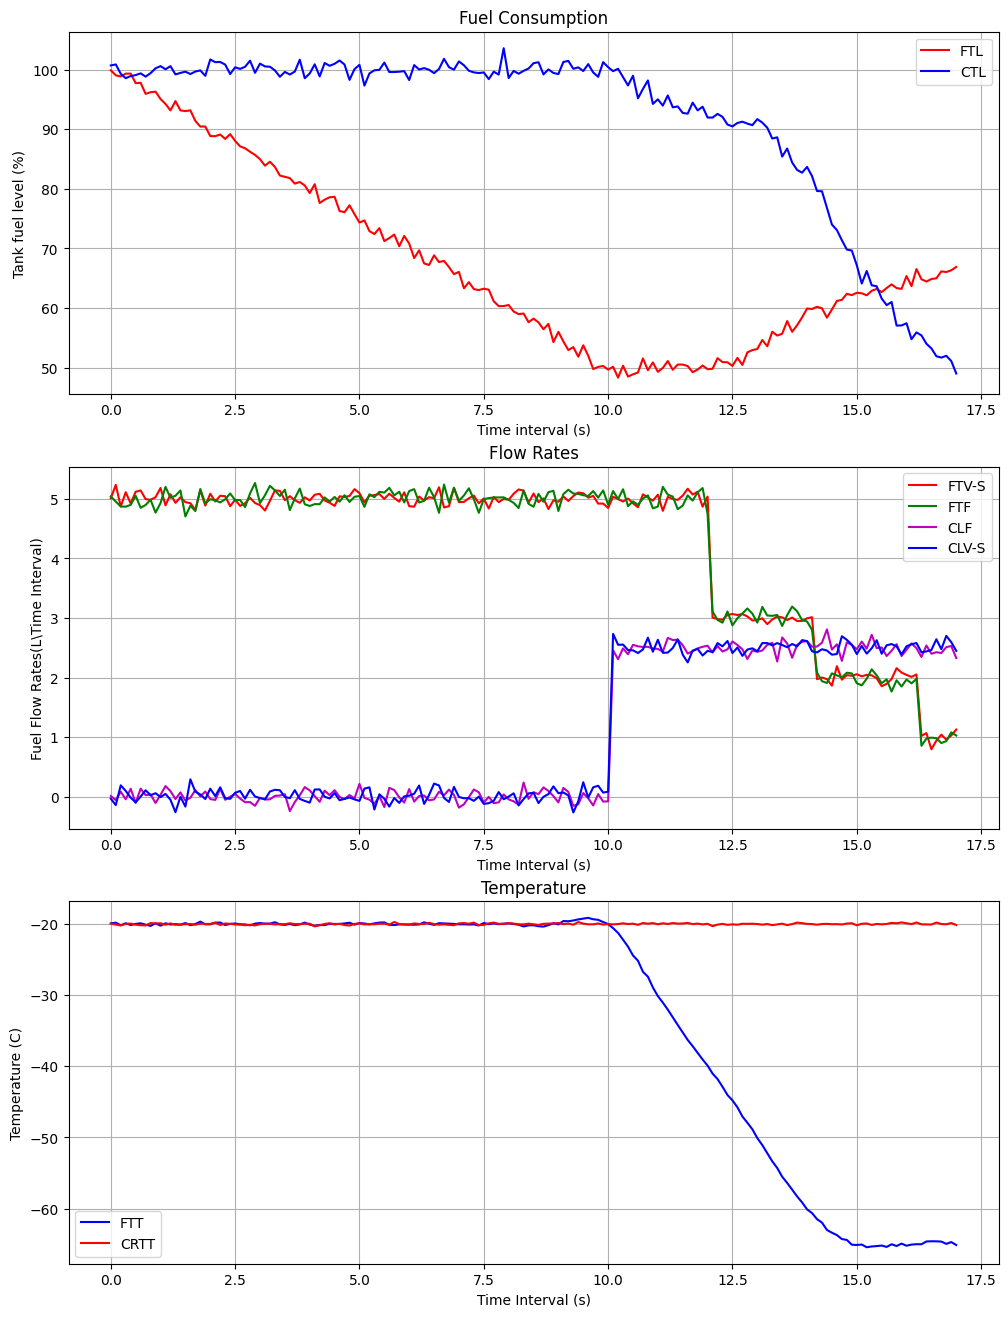

In [10]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_3['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_3['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_3['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_3['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_3['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_3['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_3['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_3['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 4

*Описание сценария*

In [20]:
data_4 = pd.read_csv('sample_data/Scenario_Four.csv')

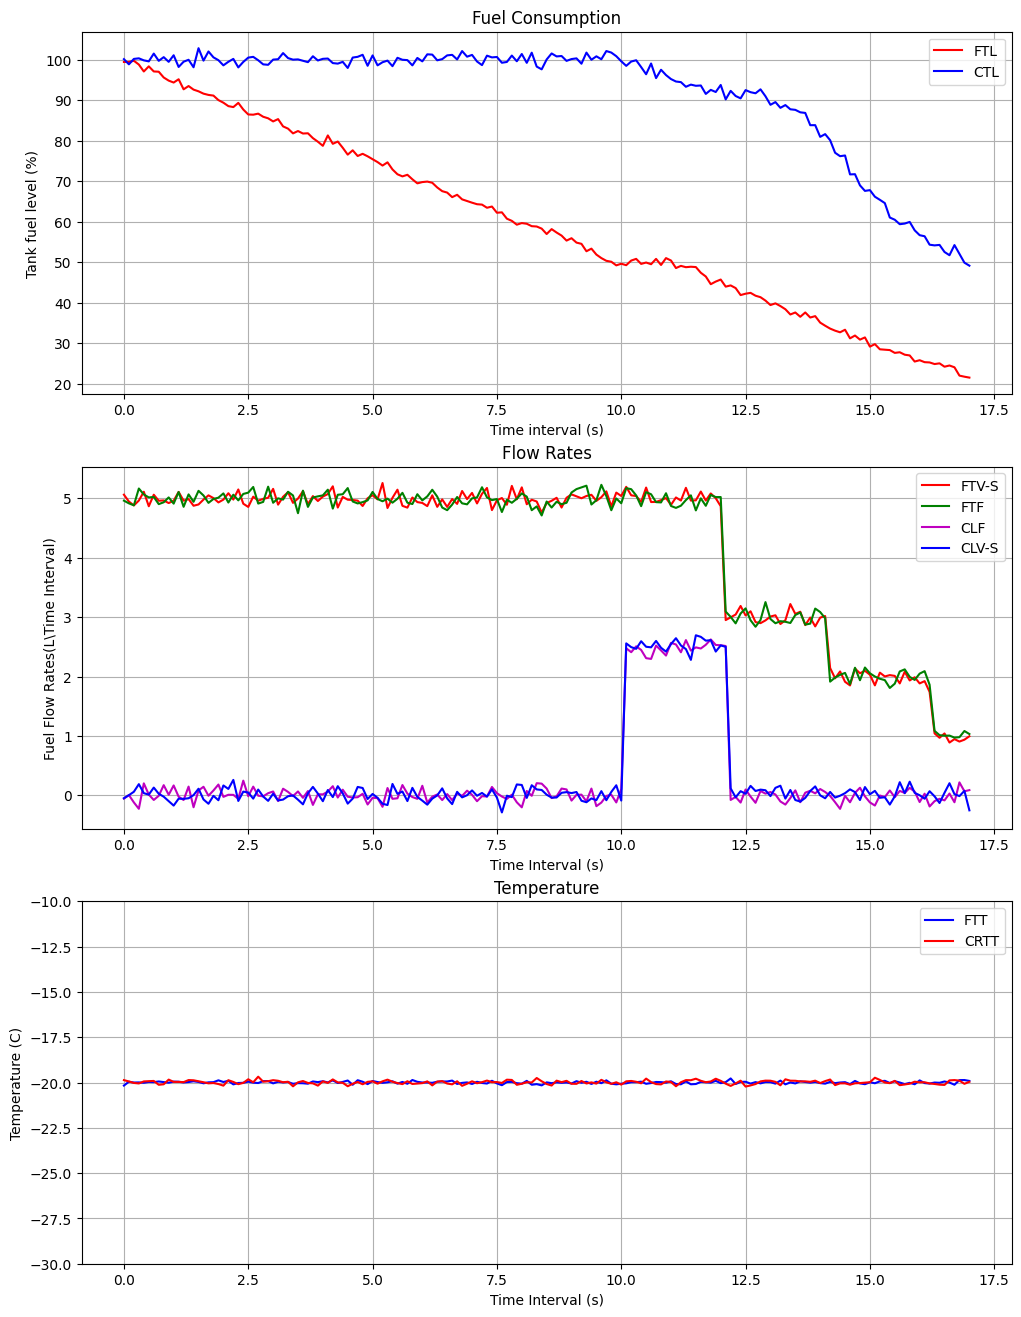

In [12]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_4['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_4['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_4['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_4['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_4['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_4['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_4['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_4['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].set_ylim([-30, -10])
axs[2].legend()
axs[2].grid()

## Аугментация

Создадим временной ряд из 500 периодов нормального сценария.

3/4 поместим в обучающий датасет, оставшуюся 1/4 -- в тестовый. 

Причем в тестовый набор данных будет произвольным образом вставлены 5 периодов различных аномальных сценариев.

### Нормальный сценарий

In [48]:
aug_FTL = []

aug_CTL = []

aug_FTV_S = []

aug_FTF = []

aug_CLF = []

aug_CLV_S = []

aug_FTT = []

aug_CRTT = []


augmenter = (
  TimeWarp(n_speed_change=2, max_speed_ratio=1.2)
  + Dropout(p=0.05, fill='ffill')
  + AddNoise(scale=0.005)
)

In [49]:
x = np.arange(0, 500 * LENGTH_PERIOD, 0.1)

In [50]:
for i in range(0, 500):
  cur_aug_FTL = augmenter.augment(np.array(data_normal['FTL']))
  aug_FTL = np.concatenate([aug_FTL, cur_aug_FTL])

  cur_aug_CTL = augmenter.augment(np.array(data_normal['CTL']))
  aug_CTL = np.concatenate([aug_CTL, cur_aug_CTL])

  cur_aug_FTV_S = augmenter.augment(np.array(data_normal['FTV_S']))
  aug_FTV_S = np.concatenate([aug_FTV_S, cur_aug_FTV_S])

  cur_aug_FTF = augmenter.augment(np.array(data_normal['FTF']))
  aug_FTF = np.concatenate([aug_FTF, cur_aug_FTF])

  cur_aug_CLF = augmenter.augment(np.array(data_normal['CLF']))
  aug_CLF = np.concatenate([aug_CLF, cur_aug_CLF])

  cur_aug_CLV_S = augmenter.augment(np.array(data_normal['CLV_S']))
  aug_CLV_S = np.concatenate([aug_CLV_S, cur_aug_CLV_S])

  cur_aug_FTT = augmenter.augment(np.array(data_normal['FTT']))
  aug_FTT = np.concatenate([aug_FTT, cur_aug_FTT])

  cur_aug_CRTT = augmenter.augment(np.array(data_normal['CRTT']))
  aug_CRTT = np.concatenate([aug_CRTT, cur_aug_CRTT])

Введем тип сценария: 0 - нормальный, ненулевые - аномальные.

In [51]:
type = [0 for i in range(500 * NUMBER_POINTS)]

In [52]:
df_train = pd.DataFrame({'time': x[0:375 * NUMBER_POINTS],'FTL': aug_FTL[0:375 * NUMBER_POINTS], 'CTL': aug_CTL[0:375 * NUMBER_POINTS], 'FTV_S': aug_FTV_S[0:375 * NUMBER_POINTS], 'FTF': aug_FTF[0:375 * NUMBER_POINTS], 'CLF': aug_CLF[0:375 * NUMBER_POINTS], 'CLV_S': aug_CLV_S[0:375 * NUMBER_POINTS],'FTT': aug_FTT[0:375 * NUMBER_POINTS], 'CRTT': aug_CRTT[0:375 * NUMBER_POINTS],'type': type[0:375 * NUMBER_POINTS]})
df_train.to_csv('augmented_data/training_dataset.csv', index = False)

df_test_normal = pd.DataFrame({'time': x[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'FTL': aug_FTL[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CTL': aug_CTL[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'FTV_S': aug_FTV_S[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'FTF': aug_FTF[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CLF': aug_CLF[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CLV_S': aug_CLV_S[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'FTT': aug_FTT[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CRTT': aug_CRTT[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'type': type[375 * NUMBER_POINTS:500 * NUMBER_POINTS]})

### Аномальные сценарии

Случайным образом формируем метки для 5 периодов, каждый из которых будет расширением одного из 4 сценариев

In [56]:
import random
anom_type = [random.randint(1, 4) for i in range(5)]

In [72]:
anom_type

[4, 4, 1, 3, 2]

In [57]:
anom_aug_FTL = []

anom_aug_CTL = []

anom_aug_FTV_S = []

anom_aug_FTF = []

anom_aug_CLF = []

anom_aug_CLV_S = []

anom_aug_FTT = []

anom_aug_CRTT = []

anom_aug_type = []


augmenter = (
  TimeWarp(n_speed_change=2, max_speed_ratio=1.2)
  + Dropout(p=0.05, fill='ffill')
  + AddNoise(scale=0.005)
)

In [58]:
for cur_type in anom_type:
  match cur_type:
    case 1:
      cur_data = data_1
    case 2:
      cur_data = data_2
    case 3:
      cur_data = data_3
    case 4:
      cur_data = data_4

  cur_anom_aug_FTL = augmenter.augment(np.array(cur_data['FTL']))
  anom_aug_FTL = np.concatenate([anom_aug_FTL, cur_anom_aug_FTL])

  cur_anom_aug_CTL = augmenter.augment(np.array(cur_data['CTL']))
  anom_aug_CTL = np.concatenate([anom_aug_CTL, cur_anom_aug_CTL])

  cur_anom_aug_FTV_S = augmenter.augment(np.array(cur_data['FTV_S']))
  anom_aug_FTV_S = np.concatenate([anom_aug_FTV_S, cur_anom_aug_FTV_S])

  cur_anom_aug_FTF = augmenter.augment(np.array(cur_data['FTF']))
  anom_aug_FTF = np.concatenate([anom_aug_FTF, cur_anom_aug_FTF])

  cur_anom_aug_CLF = augmenter.augment(np.array(cur_data['CLF']))
  anom_aug_CLF = np.concatenate([anom_aug_CLF, cur_anom_aug_CLF])

  cur_anom_aug_CLV_S = augmenter.augment(np.array(cur_data['CLV_S']))
  anom_aug_CLV_S = np.concatenate([anom_aug_CLV_S, cur_anom_aug_CLV_S])

  cur_anom_aug_FTT = augmenter.augment(np.array(cur_data['FTT']))
  anom_aug_FTT = np.concatenate([anom_aug_FTT, cur_anom_aug_FTT])

  cur_anom_aug_CRTT = augmenter.augment(np.array(cur_data['CRTT']))
  anom_aug_CRTT = np.concatenate([anom_aug_CRTT, cur_anom_aug_CRTT])

  anom_aug_type = np.concatenate([anom_aug_type, [cur_type for i in range(NUMBER_POINTS)]])

x = np.arange(0, 5 * LENGTH_PERIOD, 0.1)

df_test_notnormal = pd.DataFrame({'time': x[0:5 * NUMBER_POINTS],'FTL': anom_aug_FTL[0:5 * NUMBER_POINTS], 'CTL': anom_aug_CTL[0:5 * NUMBER_POINTS], 'FTV_S': anom_aug_FTV_S[0:5 * NUMBER_POINTS], 'FTF': anom_aug_FTF[0:5 * NUMBER_POINTS], 'CLF': anom_aug_CLF[0:5 * NUMBER_POINTS], 'CLV_S': anom_aug_CLV_S[0:10 * NUMBER_POINTS],'FTT': anom_aug_FTT[0:5 * NUMBER_POINTS], 'CRTT': anom_aug_CRTT[0:5 * NUMBER_POINTS],'type': np.full(5 * NUMBER_POINTS, 1)})

In [59]:
df_test_notnormal

,time,FTL,CTL,FTV_S,FTF,CLF,CLV_S,FTT,CRTT,type
0,0.0,99.036084,100.284144,5.076635,4.976706,-0.047053,-0.065229,-20.168604,-19.870009,1
1,0.1,99.690783,98.982677,4.955976,4.898125,0.015274,0.008211,-19.961627,-19.932974,1
2,0.2,99.730421,99.903003,4.833865,4.896417,-0.116411,0.097617,-19.998185,-20.012127,1
3,0.3,99.460699,100.290419,4.967783,4.967672,-0.219630,0.146555,-20.003027,-20.048265,1
4,0.4,97.004150,99.797292,5.077599,5.158328,0.201242,0.005717,-19.975749,-19.962487,1
...,...,...,...,...,...,...,...,...,...,...
850,85.0,59.795083,52.516315,1.001625,0.942415,2.471819,2.417749,-44.897013,-19.990948,1
851,85.1,59.195686,51.009846,1.065224,0.960873,2.636874,2.540662,-45.023283,-20.018155,1
852,85.2,59.933026,51.900382,0.904730,1.087122,2.662822,2.609927,-45.034347,-20.055618,1
853,85.3,59.670943,50.114769,0.845638,0.940238,2.679823,2.520684,-45.025906,-20.005764,1


In [60]:
random_indexes = random.sample(range(1, 124), 5)
random_indexes.sort()

In [73]:
random_indexes

[11, 22, 41, 50, 113]

In [61]:
df_test = pd.DataFrame({'time': [],
                          'FTL': [], 'CTL': [],
                          'FTV_S': [], 'FTF': [], 'CLF': [], 'CLV_S': [],
                          'FTT': [], 'CRTT': [],
                          'type': []})

prev_index = 0
iter_notnormal = 0
for cur_index in random_indexes:
  #print(f'{iter_notnormal}: ({prev_index}, {cur_index})')
  df_test = pd.concat([df_test, df_test_normal[prev_index * NUMBER_POINTS : cur_index * NUMBER_POINTS]], ignore_index=True)
  prev_index = cur_index
  df_test = pd.concat([df_test, df_test_notnormal[iter_notnormal * NUMBER_POINTS : (iter_notnormal + 1) * NUMBER_POINTS]], ignore_index=True)
  iter_notnormal += 1

df_test = pd.concat([df_test, df_test_normal[prev_index * NUMBER_POINTS:]], ignore_index=True)

In [62]:
df_test.to_csv('augmented_data/test_dataset.csv', index = False)

In [63]:
df_test

,time,FTL,CTL,FTV_S,FTF,CLF,CLV_S,FTT,CRTT,type
0,6412.5,100.623432,99.315696,5.032648,5.153818,0.156089,-0.270608,-19.896668,-20.052190,0.0
1,6412.6,98.804630,100.671665,4.949913,5.016846,-0.106367,-0.010776,-20.066105,-20.047591,0.0
2,6412.7,98.879585,99.344266,4.953451,5.074619,-0.116191,-0.073322,-20.035464,-19.993053,0.0
3,6412.8,98.568228,99.870972,5.040376,5.116722,-0.020141,-0.019755,-19.921084,-19.921358,0.0
4,6412.9,97.400789,99.477811,5.192618,5.104204,0.056597,-0.027300,-19.851732,-19.893594,0.0
...,...,...,...,...,...,...,...,...,...,...
22225,8549.5,37.815235,33.713694,4.878265,4.964580,2.520511,2.502213,-19.957000,-19.903319,0.0
22226,8549.6,37.997457,34.331562,4.988313,5.096801,2.502722,2.394378,-19.934785,-19.946343,0.0
22227,8549.7,37.107925,32.451698,5.052071,5.009571,2.525583,2.491999,-19.971693,-19.975754,0.0
22228,8549.8,36.978144,32.284495,5.031425,5.085555,2.556620,2.514688,-20.030921,-20.010068,0.0


# Обнаружение аномалий

In [43]:
from darts import TimeSeries

In [3]:
time_series_train = TimeSeries.from_csv('augmented_data/training_dataset.csv')
time_series_test = TimeSeries.from_csv('augmented_data/test_dataset.csv')

In [44]:
ts_train_anomaly_labels = time_series_train['type']

ts_test_anomaly_labels = time_series_test['type']

In [5]:
period = 171

## Обучение

### FTL & CTL (уровень топлива)

In [16]:
ts_train = time_series_train[['FTL', 'CTL']]
ts_test = time_series_test[['FTL', 'CTL']]

In [17]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel(lags=period)

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

# Fit anomaly model
START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=True)

forecasting_model.save('FTL_CTL.pkl')

### FTV_S, FTF, CLF, CLV_S (расход топлива)

In [12]:
ts_train = time_series_train[['FTV_S', 'FTF', 'CLF', 'CLV_S']]
ts_test = time_series_test[['FTV_S', 'FTF', 'CLF', 'CLV_S']]

In [13]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel(lags=period)

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

# Fit anomaly model
START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=True)

forecasting_model.save('FTVS_FTF_CLF_CLVS.pkl')

### FTT & CRTT (температура)

In [6]:
ts_train = time_series_train[['FTT', 'CRTT']]
ts_test = time_series_test[['FTT', 'CRTT']]

In [7]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel(lags=period)

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

# Fit anomaly model
START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=True)

forecasting_model.save('FTT_CRTT.pkl')

### Учет всех параметров

In [42]:
ts_train = time_series_train[['FTL', 'CTL', 'FTV_S', 'FTF', 'CLF', 'CLV_S', 'FTT', 'CRTT']]
ts_test = time_series_test[['FTL', 'CTL', 'FTV_S', 'FTF', 'CLF', 'CLV_S', 'FTT', 'CRTT']]

In [ ]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel(lags=period)

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

# Fit anomaly model
START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=True)

forecasting_model.save('ALL_PARAMETERS.pkl')

## Распознавание

### FTL & CTL (уровень топлива)

In [ ]:
ts_train = time_series_train[['FTL', 'CTL']]
ts_test = time_series_test[['FTL', 'CTL']]

In [ ]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel.load('FTL_CTL.pkl')

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=False)

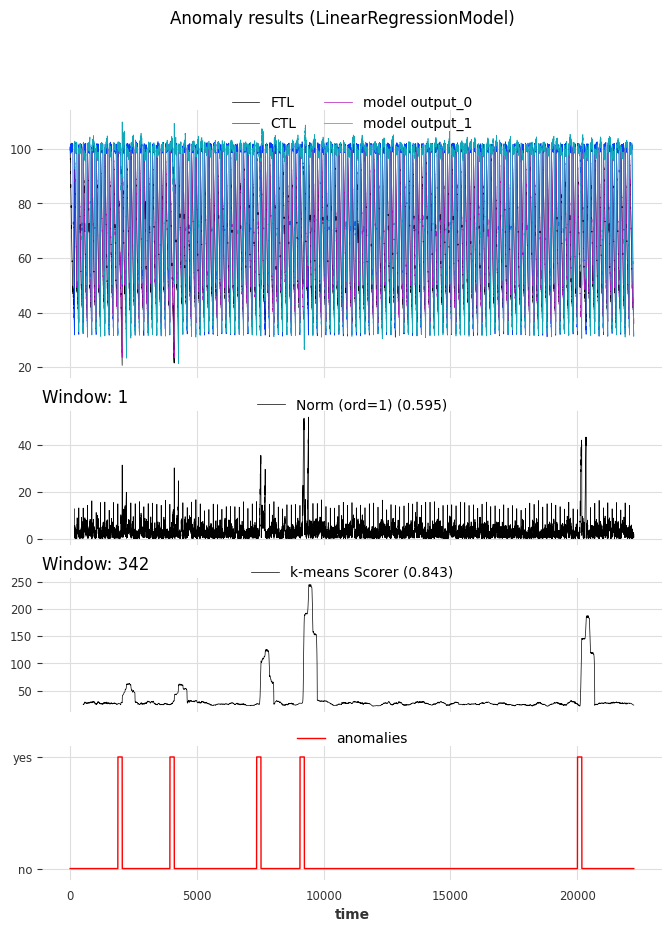

In [19]:
START = 171
anomaly_model.show_anomalies(
    series=ts_test,
    actual_anomalies=ts_test_anomaly_labels,
    start=START,
    metric="AUC_ROC"
)
plt.show()

In [ ]:
anomaly_scores, model_forecasting = anomaly_model.score(
    ts_test, start=START, return_model_prediction=True
)

# Compute the MAE and RMSE on the test set
print(f"On testing set -> MAE: {mae(model_forecasting, ts_test)}, RMSE: {rmse(model_forecasting, ts_test)}")

On testing set -> MAE: 1.6761521375207042, RMSE: 2.682402762685008


### FTV_S, FTF, CLF, CLV_S (расход топлива)

In [ ]:
ts_train = time_series_train[['FTV_S', 'FTF', 'CLF', 'CLV_S']]
ts_test = time_series_test[['FTV_S', 'FTF', 'CLF', 'CLV_S']]

In [ ]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel.load('FTVS_FTF_CLF_CLVS.pkl')

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=False)

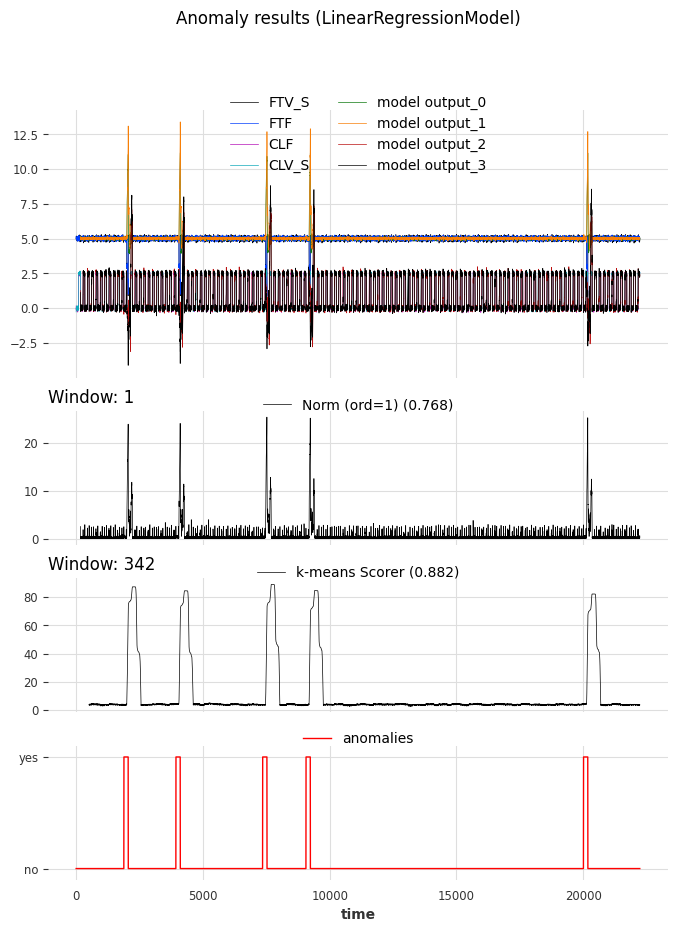

In [15]:
START = 171
anomaly_model.show_anomalies(
    series=ts_test,
    actual_anomalies=ts_test_anomaly_labels,
    start=START,
    metric="AUC_ROC"
)
plt.show()

In [ ]:
anomaly_scores, model_forecasting = anomaly_model.score(
    ts_test, start=START, return_model_prediction=True
)

# Compute the MAE and RMSE on the test set
print(f"On testing set -> MAE: {mae(model_forecasting, ts_test)}, RMSE: {rmse(model_forecasting, ts_test)}")

On testing set -> MAE: 0.17614154014854744, RMSE: 0.6625944263392245


### FTT & CRTT (температура)

In [25]:
ts_train = time_series_train[['FTT', 'CRTT']]
ts_test = time_series_test[['FTT', 'CRTT']]

In [26]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel.load('FTT_CRTT.pkl')

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=False)

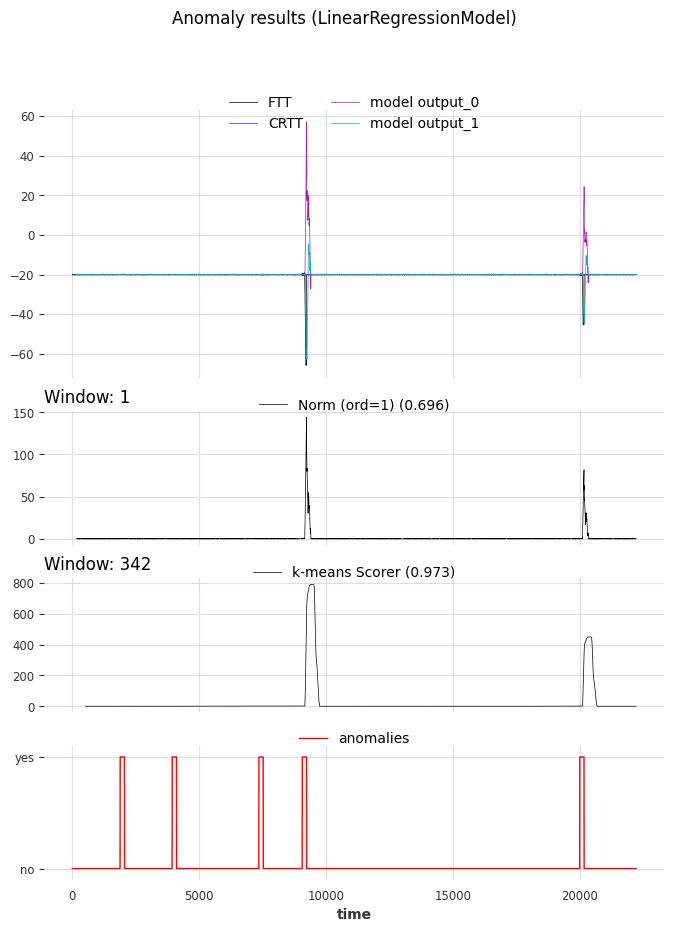

In [36]:
START = 171
anomaly_model.show_anomalies(
    series=ts_test,
    actual_anomalies=ts_test_anomaly_labels,
    start=START,
    metric="AUC_ROC"
)
plt.show()

In [37]:
anomaly_scores, model_forecasting = anomaly_model.score(
    ts_test, start=START, return_model_prediction=True
)

# Compute the MAE and RMSE on the test set
print(f"On testing set -> MAE: {mae(model_forecasting, ts_test)}, RMSE: {rmse(model_forecasting, ts_test)}")

On testing set -> MAE: 0.4990960191003404, RMSE: 3.976373196759024


### Учет всех параметров

In [38]:
ts_train = time_series_train[['FTL', 'CTL', 'FTV_S', 'FTF', 'CLF', 'CLV_S', 'FTT', 'CRTT']]
ts_test = time_series_test[['FTL', 'CTL', 'FTV_S', 'FTF', 'CLF', 'CLV_S', 'FTT', 'CRTT']]

In [ ]:
from darts.metrics import mae, rmse
from darts.models import LinearRegressionModel
from darts.ad.scorers import NormScorer, KMeansScorer
from darts.ad.anomaly_model.forecasting_am import ForecastingAnomalyModel
from tqdm.autonotebook import tqdm

forecasting_model = LinearRegressionModel.load('ALL_PARAMETERS.pkl')

anomaly_model = ForecastingAnomalyModel(
    model=forecasting_model,
    scorer=[
        NormScorer(ord=1),
        KMeansScorer(k=50, window=2*period)
    ]
)

START = period
anomaly_model.fit(ts_train, start=START, allow_model_training=False)

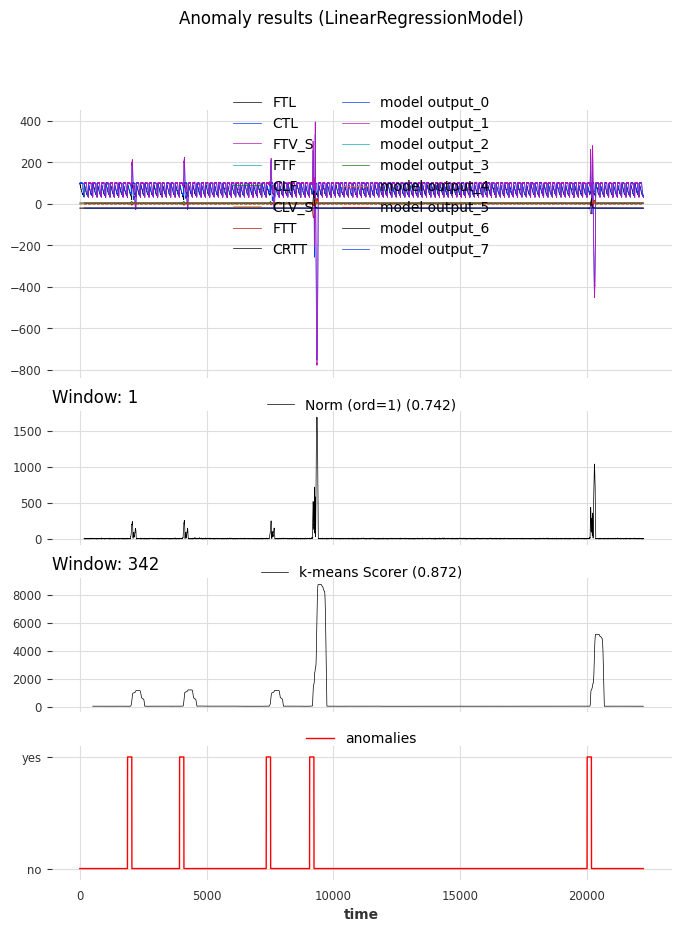

In [40]:
START = 171
anomaly_model.show_anomalies(
    series=ts_test,
    actual_anomalies=ts_test_anomaly_labels,
    start=START,
    metric="AUC_ROC"
)
plt.show()

In [41]:
anomaly_scores, model_forecasting = anomaly_model.score(
    ts_test, start=START, return_model_prediction=True
)

# Compute the MAE and RMSE on the test set
print(f"On testing set -> MAE: {mae(model_forecasting, ts_test)}, RMSE: {rmse(model_forecasting, ts_test)}")

On testing set -> MAE: 2.1548602586656456, RMSE: 13.667729262532516
